Import packages

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

seed = 1234
np.random.seed(seed)
torch.manual_seed(seed)

Computing gradients

In [2]:
x = torch.tensor(4.0, requires_grad=True)
y = x**2
y.backward() # 反向傳導
grad = x.grad
print(f"y = {y}")
print(f"grad = {grad}")

y = 16.0
grad = 8.0


![](https://i.imgur.com/jVfVhBu.png)

In [3]:
x = torch.ones(5)
y = torch.zeros(3)
w = torch.ones(5, 3, requires_grad=True)
b = torch.zeros(3, requires_grad=True)

z = x @ w + b
loss = torch.mean((z - y)**2)
loss.backward()

dl_dw, dl_db = w.grad, b.grad
print(dl_dw)
print(dl_db)

tensor([[3.3333, 3.3333, 3.3333],
        [3.3333, 3.3333, 3.3333],
        [3.3333, 3.3333, 3.3333],
        [3.3333, 3.3333, 3.3333],
        [3.3333, 3.3333, 3.3333]])
tensor([3.3333, 3.3333, 3.3333])


Gradient Descent

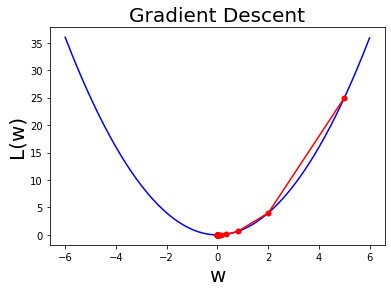

In [4]:
def func(x):
    return x ** 2

def dfunc(x):
    x = torch.tensor(float(x), requires_grad=True)
    y = func(x)
    y.backward()
    return x.grad

def GradientDescent(w_inti, epochs, lr):
    history = np.zeros(epochs+1)
    w = w_inti
    history[0] = w
    for i in range(epochs):
        dw = dfunc(w)
        w -= dw * lr
        history[i+1] = w
    return history

w_inti = 5
epochs = 15
lr = 0.3

w = np.arange(-6.0, 6.0, 0.01)
plt.plot(w, func(w), c='b')

history = GradientDescent(w_inti, epochs, lr)
plt.plot(history, func(history), c='r', marker='o', markersize=5)

plt.title('Gradient Descent', fontsize=20)
plt.xlabel('w', fontsize=20)
plt.ylabel('L(w)', fontsize=20)
plt.show()

Simple Linear Regression

In [5]:
def MSE(y, y_pred):
    return torch.square(y - y_pred).mean()

def predict(X, w, b):
    return w * X + b

def train_step(w, b, X, y, lr):
    y_pred = predict(X, w, b)

    loss = MSE(y, y_pred)
    loss.backward()

    with torch.no_grad():
        dw, db = w.grad, b.grad 
        w -= lr * dw
        b -= lr * db

    w.grad.zero_()
    b.grad.zero_()

    return loss

def train(X, y, epochs=100, lr=0.0001):
    X = torch.tensor(X)
    y = torch.tensor(y)
    w = torch.ones(1, requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    loss_list = np.zeros((epochs))
    
    for epoch in range(epochs):     
        loss = train_step(w, b, X, y, lr)
        loss_list[epoch] = loss.item()

    return w.item(), b.item(), loss_list

In [6]:
n = 100
X = np.linspace(0, 50, n) 
y = np.linspace(0, 50, n) 

X += np.random.uniform(-10, 10, n) 
y += np.random.uniform(-10, 10, n) 

In [7]:
w, b, loss_list = train(X, y, epochs=50000)
print(f'w={w}, b={b}')

w=0.9038912653923035, b=2.750936269760132


In [8]:
coef = np.polyfit(X, y, deg=1)
print(f'w={coef[0]}, b={coef[1]}')

w=0.8980486323068566, b=2.953413107424617


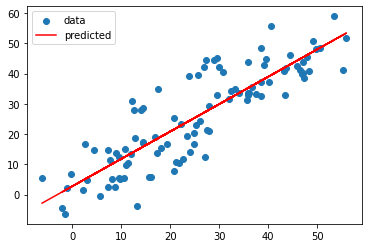

In [9]:
plt.scatter(X, y, label='data')
plt.plot(X, w * X + b, 'r-', label='predicted')
plt.legend()
plt.show()

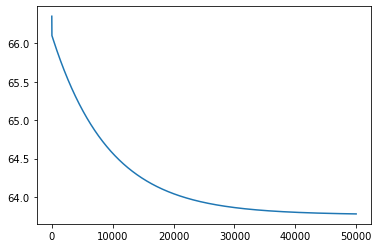

In [10]:
plt.plot(loss_list)
plt.show()

Simple Linear Regression with optimizer

In [11]:
def train_step(X, y, model, loss_fn, optimizer):
    y_pred = model(X)
    loss = loss_fn(y_pred, y) 

    optimizer.zero_grad()

    loss.backward()  

    optimizer.step()
    return loss

def train(X, y, epochs=100, lr=0.0001):
    X = torch.tensor(X, dtype=torch.float32)
    y = torch.tensor(y, dtype=torch.float32)

    model = torch.nn.Sequential(
                torch.nn.Linear(1, 1)
            )
    loss_fn = torch.nn.MSELoss(reduction='sum')
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    loss_list = np.zeros((epochs))
    for epoch in range(epochs):
        loss = train_step(X, y, model, loss_fn, optimizer)
        loss_list[epoch] = loss.item()

    layer_0 = model[0].state_dict()
    w = layer_0['weight'][0].item()
    b = layer_0['bias'][0].item()
    
    return w, b, loss_list

In [12]:
n = 100
X = np.linspace(0, 50, n)
y = np.linspace(0, 50, n)

X += np.random.uniform(-10, 10, n)
y += np.random.uniform(-10, 10, n)

In [13]:
w, b, loss_list = train(X.reshape(-1, 1), y.reshape(-1, 1), epochs=50000)
print(f'w={w}, b={b}')

w=0.8806843161582947, b=3.1474251747131348


In [14]:
coef = np.polyfit(X, y, deg=1)
print(f'w={coef[0]}, b={coef[1]}')

w=0.8806844196937823, b=3.1474246704277866


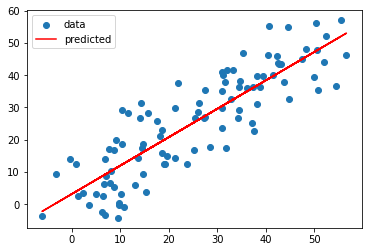

In [15]:
plt.scatter(X, y, label='data')
plt.plot(X, w * X + b, 'r-', label='predicted')
plt.legend()
plt.show()

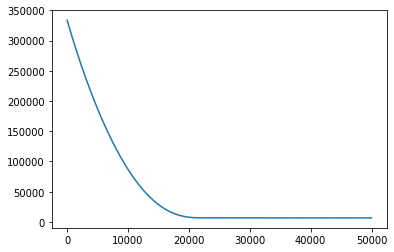

In [16]:
plt.plot(loss_list)
plt.show()